In [20]:
import pandas as pd
import numpy as np

In [21]:
train = pd.read_csv('cleaned_dataset_final.csv')

In [22]:
from sklearn.model_selection import train_test_split

X = train.drop('Persistent',axis=1)
y = train['Persistent']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=42)


In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC(probability=True)


model.fit(X_train,y_train)

SVC(probability=True)

In [25]:
predictions = model.predict(X_test)

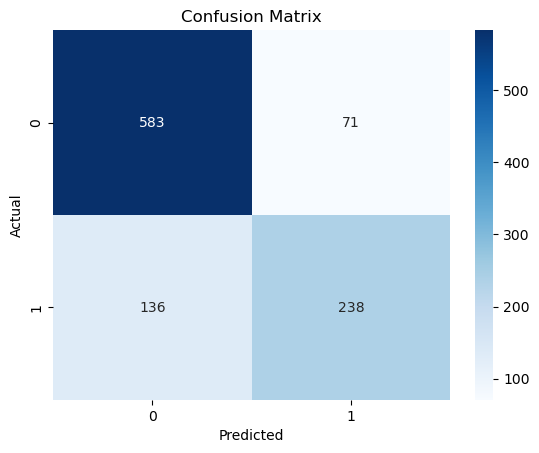

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [27]:

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       654
           1       0.77      0.64      0.70       374

    accuracy                           0.80      1028
   macro avg       0.79      0.76      0.77      1028
weighted avg       0.80      0.80      0.79      1028



In [28]:
from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba[:, 1])
print("ROC-AUC score:", roc_auc)


ROC-AUC score: 0.8727125545797969
